# Obtaining and Cleaning the Audio Features Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [190]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data

client_id= ""
client_secret= ""

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('album_ratings.csv')

In [192]:
df.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


In [193]:
def songs_from_spotify_album(artist):
    print('Working', artist)
    artist_album = list(df[df.Artist == artist].Title)[0]
    list_song_id = []
    if sp.search(artist)['tracks']['items'] != []:
        artist_albums = sp.artist_albums(sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri'])
        # getting all songs from album
        for i in range(len(artist_albums['items'])):
            if artist_albums['items'][i]['name'] == artist_album:
                for j in sp.album_tracks(artist_albums['items'][i]['id'])['items']:
                    list_song_id.append(j['id'])
        print('Finished', artist)  
        return list_song_id
    print('Not Found', artist)
    return []

In [194]:
a = songs_from_spotify_album('Ed Sheeran')

Working Ed Sheeran
Finished Ed Sheeran


In [195]:
def mean_features(album_songs_list):
    danceability = []
    energy = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    for song in album_songs_list:
        feat = sp.audio_features(song)[0]
        if feat != None:
            danceability.append(feat['danceability'])
            energy.append(feat['energy'])
            loudness.append(feat['loudness'])
            mode.append(feat['mode'])
            speechiness.append(feat['speechiness'])
            acousticness.append(feat['acousticness'])
            instrumentalness.append(feat['instrumentalness'])
            liveness.append(feat['liveness'])
            valence.append(feat['valence'])
            tempo.append(feat['tempo'])
        else:
            danceability.append(0)
            energy.append(0)
            loudness.append(0)
            mode.append(0)
            speechiness.append(0)
            acousticness.append(0)
            instrumentalness.append(0)
            liveness.append(0)
            valence.append(0)
            tempo.append(0)
    list_means = [
        np.mean(danceability),
        np.mean(energy),
        np.mean(loudness),
        np.mean(mode),
        np.mean(speechiness),
        np.mean(acousticness),
        np.mean(instrumentalness),
        np.mean(liveness),
        np.mean(valence),
        np.mean(tempo)  
    ] 
    return list_means

In [209]:
# putting it all together
list_features = []
for a in list(df.Artist)[4696:]:
    l = songs_from_spotify_album(a)
    if l != []:
        list_features.append(mean_features(l))  
        print(len(list_features))
    else:
        print('No Album Found')
        list_features.append([0])

Working Milo Greene
Finished Milo Greene
1
Working The Coral
Finished The Coral
No Album Found
Working The Coral
Finished The Coral
No Album Found
Working The Coral
Finished The Coral
No Album Found
Working I Am Kloot
Finished I Am Kloot
5
Working Morcheeba
Finished Morcheeba
6
Working Scout Niblett
Finished Scout Niblett
No Album Found
Working will.i.am
Finished will.i.am
No Album Found
Working Arcane Roots
Finished Arcane Roots
9
Working The Child of Lov
Finished The Child of Lov
No Album Found
Working Bibio
Finished Bibio
11
Working Bibio
Finished Bibio
12
Working British Sea Power
Finished British Sea Power
13
Working Editors
Finished Editors
No Album Found
Working Derek and The Dominos
Finished Derek and The Dominos
15
Working Wampire
Finished Wampire
No Album Found
Working Sam Amidon
Finished Sam Amidon
17
Working Dean Blunt
Finished Dean Blunt
18
Working Sharon Jones & the Dap-Kings
Finished Sharon Jones & the Dap-Kings
19
Working David Byrne
Finished David Byrne
20
Working Davi

KeyboardInterrupt: 

In [210]:
pd.DataFrame(data = {'Data':list_features}).to_csv('R4.csv', index = False)

In [196]:
df_r3 = pd.read_csv('R3.csv')

In [197]:
df_rr = pd.read_csv('R2.csv')
df_rr.head()

,Data
0,"[0.4766363636363636, 0.507409090909091, -9.189..."
1,[0]
2,"[0.43658064516129047, 0.8959354838709679, -4.2..."
3,"[0.5165000000000001, 0.6405833333333333, -6.55..."
4,"[0.6989583333333332, 0.4590745833333334, -9.00..."


In [198]:
df_s = pd.read_csv('RatingsRest.csv')
df_s.head()

,Data
0,[0]
1,"[0.570125, 0.68425, -6.4345625, 0.6875, 0.0715..."
2,"[0.5449285714285715, 0.8244999999999999, -5.02..."
3,[0]
4,"[0.7304999999999999, 0.24610000000000004, -15...."


In [199]:
df_rating = pd.read_csv('Ratings.csv')
df_rating.head()

,Data
0,"[0.4068, 0.45527733333333337, -10.618200000000..."
1,[0]
2,"[0.34745454545454546, 0.8231818181818181, -6.4..."
3,[0]
4,[0]


In [200]:
# counting zeros:
j = 0
for i in range(len(list(df_rating.Data))):
    if list(df_rating.Data)[i] == '[0]':
        j += 1

In [201]:
j/len(df_rating.index)*100

49.80353634577603

In [202]:
# counting zeros:
j = 0
for i in range(len(list(df_s.Data))):
    if list(df_s.Data)[i] == '[0]':
        j += 1

In [203]:
j/len(df_s.index)*100

48.62385321100918

In [204]:
df_t = pd.read_csv('RatingsThree.csv')
df_t.head()

,Data
0,[0]
1,[0]
2,[0]
3,[0]
4,[0]


In [205]:
j = 0
for i in range(len(list(df_t.Data))):
    if list(df_t.Data)[i] == '[0]':
        j += 1

In [206]:
j/len(df_t.index)*100

50.57833859095688

In [211]:
df_r5 = pd.read_csv('R4.csv')
df_r5.head()

,Data
0,"[0.45557692307692305, 0.4278153846153846, -13...."
1,[0]
2,[0]
3,[0]
4,"[0.45430000000000004, 0.33756499999999995, -10..."


In [212]:
len(df_s.index) + len(df_rating.index) + len(df_t.index) + len(df_rr.index) +  len(df_r3.index) + len(df_r4.index) + + len(df_r5.index)

5590

In [16]:
# overall, about 50 percent of the data for the albums is not in the Spotify database
# let's take care of duplicate entries

In [213]:
df_selected = df.iloc[0:5590,:]
df_selected['Features'] = list(df_rating.Data) + list(df_s.Data) + list(df_t.Data) +  list(df_rr.Data) + list(df_r3.Data) + list(df_r4.Data) + list(df_r5.Data)

In [214]:
df_selected.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews,Features
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55,"[0.4068, 0.45527733333333337, -10.618200000000..."
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8,[0]
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335,"[0.34745454545454546, 0.8231818181818181, -6.4..."
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38,[0]
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44,[0]


In [140]:
# get uniques

In [215]:
to_drop = []
for i in range(len(df_selected.index)):
    if df_selected.iloc[i,:].Features == '[0]':
        to_drop.append(i)

In [216]:
df_selected = df_selected.drop(to_drop)

In [217]:
df_selected.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews,Features
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55,"[0.4068, 0.45527733333333337, -10.618200000000..."
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335,"[0.34745454545454546, 0.8231818181818181, -6.4..."
6,M. Ward,Hold Time,February,17,2009,LP,Merge Records,Folk,79.0,31.0,8.8,23.0,76,24,76,22,"[0.42947142857142867, 0.5524285714285714, -9.7..."
7,Lily Allen,"It's Not Me, It's You",February,10,2009,LP,EMI/Parlophone,Pop,71.0,32.0,8.1,155.0,68,29,79,209,"[0.6714246575342465, 0.8173150684931507, -6.61..."
9,The Decemberists,The Hazards of Love,March,24,2009,LP,Capitol Records,Indie Rock,73.0,31.0,8.5,98.0,73,29,76,66,"[0.41735294117647065, 0.5431764705882353, -8.3..."


In [218]:
# only keep uniques

In [219]:
uniques = []
indices_nonunique = []
for i in range(len(df_selected.index)):
    if df_selected.iloc[i,:].Artist not in uniques:
        uniques.append(df_selected.iloc[i,:].Artist) 
    else:
        indices_nonunique.append(i)

In [220]:
df_selected = df_selected.reset_index(drop=True)

In [221]:
for i in indices_nonunique:
    df_selected = df_selected.drop(i)

In [222]:
df_selected.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews,Features
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55,"[0.4068, 0.45527733333333337, -10.618200000000..."
1,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335,"[0.34745454545454546, 0.8231818181818181, -6.4..."
2,M. Ward,Hold Time,February,17,2009,LP,Merge Records,Folk,79.0,31.0,8.8,23.0,76,24,76,22,"[0.42947142857142867, 0.5524285714285714, -9.7..."
3,Lily Allen,"It's Not Me, It's You",February,10,2009,LP,EMI/Parlophone,Pop,71.0,32.0,8.1,155.0,68,29,79,209,"[0.6714246575342465, 0.8173150684931507, -6.61..."
4,The Decemberists,The Hazards of Love,March,24,2009,LP,Capitol Records,Indie Rock,73.0,31.0,8.5,98.0,73,29,76,66,"[0.41735294117647065, 0.5431764705882353, -8.3..."


In [223]:
# parsing the features into columns

In [224]:
from ast import literal_eval

In [225]:
#danceability
dance = []
#energy
energy = []
#loudness
loudness = []
#mode
mode = []
#speechiness
speechiness = []
#acousticness
acousticness = []
#instrumentalness
instrumentalness = []
#liveness
liveness = []
#valence
valence= []
#tempo
tempo = []

for i in range(len(df_selected.index)):
    dance.append(literal_eval(df_selected.iloc[i,:].Features)[0])
    energy.append(literal_eval(df_selected.iloc[i,:].Features)[1])
    loudness.append(literal_eval(df_selected.iloc[i,:].Features)[2])
    mode.append(literal_eval(df_selected.iloc[i,:].Features)[3])
    speechiness.append(literal_eval(df_selected.iloc[i,:].Features)[4])
    acousticness.append(literal_eval(df_selected.iloc[i,:].Features)[5])
    instrumentalness.append(literal_eval(df_selected.iloc[i,:].Features)[6])
    liveness.append(literal_eval(df_selected.iloc[i,:].Features)[7])
    valence.append(literal_eval(df_selected.iloc[i,:].Features)[8])
    tempo.append(literal_eval(df_selected.iloc[i,:].Features)[9])

In [226]:
df_selected['Danceability'] = dance

df_selected['Energy'] = energy

df_selected['Loudness'] = loudness

df_selected['Mode'] = mode

df_selected['Speechiness'] = speechiness

df_selected['Acousticness'] = acousticness

df_selected['Instrumentalness'] = instrumentalness

df_selected['Liveness'] = liveness

df_selected['Valence'] = valence

df_selected['Tempo'] = tempo

In [227]:
df_selected.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,...,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,...,0.406800,0.455277,-10.618200,0.666667,0.036700,0.508233,0.062782,0.162367,0.256187,132.201200
1,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,...,0.347455,0.823182,-6.441818,0.636364,0.092073,0.151825,0.096035,0.340427,0.406818,120.170364
2,M. Ward,Hold Time,February,17,2009,LP,Merge Records,Folk,79.0,31.0,...,0.429471,0.552429,-9.705119,0.928571,0.051164,0.367338,0.173989,0.184462,0.482071,107.641048
3,Lily Allen,"It's Not Me, It's You",February,10,2009,LP,EMI/Parlophone,Pop,71.0,32.0,...,0.671425,0.817315,-6.615822,0.657534,0.048044,0.184052,0.032417,0.146475,0.708726,125.495397
4,The Decemberists,The Hazards of Love,March,24,2009,LP,Capitol Records,Indie Rock,73.0,31.0,...,0.417353,0.543176,-8.366118,0.764706,0.035965,0.225509,0.139312,0.414412,0.246624,119.945353


In [228]:
len(df_selected.index)

1488

# Feature Engineering 

In [229]:
df_selected.to_csv('MusicFixedD.csv')

In [3]:
df_selected = pd.read_csv('MusicFixedD.csv')

In [4]:
df_selected.head()

,Unnamed: 0,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,...,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,...,0.406800,0.455277,-10.618200,0.666667,0.036700,0.508233,0.062782,0.162367,0.256187,132.201200
1,1,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,...,0.347455,0.823182,-6.441818,0.636364,0.092073,0.151825,0.096035,0.340427,0.406818,120.170364
2,2,M. Ward,Hold Time,February,17,2009,LP,Merge Records,Folk,79.0,...,0.429471,0.552429,-9.705119,0.928571,0.051164,0.367338,0.173989,0.184462,0.482071,107.641048
3,3,Lily Allen,"It's Not Me, It's You",February,10,2009,LP,EMI/Parlophone,Pop,71.0,...,0.671425,0.817315,-6.615822,0.657534,0.048044,0.184052,0.032417,0.146475,0.708726,125.495397
4,4,The Decemberists,The Hazards of Love,March,24,2009,LP,Capitol Records,Indie Rock,73.0,...,0.417353,0.543176,-8.366118,0.764706,0.035965,0.225509,0.139312,0.414412,0.246624,119.945353


In [5]:
df_selected.Genre.unique()

array(['Alt-Country', 'Psychedelic Pop', 'Folk', 'Pop', 'Indie Rock',
       'Indie Pop', 'Chamber Pop', 'Dream Pop', 'Blues Rock',
       'Alternative Rock', 'Indietronica', 'Synthpop', 'Ambient',
       'Psychedelic Folk', 'Lo-Fi', 'Hip Hop', 'Electronic',
       'Singer-Songwriter', 'Electropop', 'Techno', 'Freak Folk',
       'Post-Punk', 'Art Pop', 'Garage Rock', 'Glitch Hop', 'Punk Rock',
       'Psychedelic Rock', 'Neo-Psychedelia', 'Americana', 'Rock',
       'Post-Hardcore', 'Progressive Rock', 'Experimental', 'Indie Folk',
       'Noise Rock', 'Comedy', 'Dance Punk', 'Mathcore', 'World',
       'Neo-Soul', 'Folk Rock', 'Power Pop', 'Post-Punk Revival',
       'Post-Rock', 'Noise Pop', 'Jazz', 'R&B', 'Art Rock', 'Soul',
       'Pop Rock', 'Space Rock', 'Country', 'Industrial Rock',
       'Experimental Rock', 'Britpop', 'Hard Rock', 'Wonky',
       'Acoustic Rock', 'Thrash Metal', 'Progressive Metal', 'Chillwave',
       'Metalcore', 'IDM', 'Shoegaze', 'Sludge Metal', 'Funk',


In [6]:
# categorizing the music types into broader genres

In [7]:
pops = ['Psychedelic Pop', 'Pop', 'Indie Pop', 'Chamber Pop', 'Dream Pop', 'Synthpop', 'Psychedelic Folk',
        'Singer-Songwriter', 'Electropop','Art Pop','Power Pop','Noise Pop','Britpop', 'Pop Punk', 'Dance Pop',
       'Pop Soul','Jangle Pop','Pop Rock','Sophisti-Pop ','Ambient Pop','New Wave','Baroque Pop']
rocks = ['Indie Rock','Blues Rock', 'Alternative Rock', 'Indietronica','Post-Punk','Garage Rock','Punk Rock',
       'Psychedelic Rock', 'Neo-Psychedelia', 'Americana', 'Rock','Post-Hardcore', 'Progressive Rock', 'Experimental',
         'Noise Rock', 'Comedy', 'Dance Punk', 'Mathcore','Folk Rock','Post-Punk Revival',
       'Post-Rock','Industrial Rock','Experimental Rock','Hard Rock', 'Wonky',
       'Acoustic Rock', 'Thrash Metal', 'Chillwave', 'Metalcore','Shoegaze', 'Sludge Metal','Alternative Metal',
       'Piano Rock', 'Progressive Metal','Celtic Punk', 'Stoner Metal', 'Noise','Doom Metal','Hardcore Punk','Black Metal','Industrial',
        'Nu Metal', 'Groove Metal', 'Psychedelic', 'Art Rock', 'Death Metal']
rb_hip = ['Hip Hop','Glitch Hop','R&B','Trip Hop','Instrumental Hip Hop']
dance_electronic = ['Ambient', 'Lo-Fi','Electronic','IDM','Electro House','Dubstep','Drone','Alternative Dance','Downtempo','Dub Techno'
                   ,'Vaporwave','Footwork', 'House', 'Electro', 'Progressive House','Free Improvisation']
country_folk = ['Alt-Country','Folk','Freak Folk','Indie Folk','World',
        'Folk Rock','Microhouse','Country','Bluegrass', 'Dancehall']
jazz_soul = ['Neo-Soul','Soul','Jazz','Funk','Blues']

genres = [pops, rocks, rb_hip, dance_electronic, country_folk, jazz_soul]

In [8]:
def categorize_genre(gen):
    if gen in pops:
        return 'Pop'
    elif gen in rocks:
        return 'Rock'
    elif gen in rb_hip:
        return 'R&B_Hip-Hop'
    elif gen in dance_electronic:
        return 'Dance_Electr'
    elif gen in country_folk:
        return 'Country_Folk'
    elif gen in jazz_soul:
        return 'Jazz_Soul'

In [ ]:
df_selected['Gener_Genre'] = df_selected['Genre'].apply(categorize_genre)

In [12]:
df_selected.head()

,Unnamed: 0,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,...,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Gener_Genre
0,0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,...,0.455277,-10.618200,0.666667,0.036700,0.508233,0.062782,0.162367,0.256187,132.201200,Country_Folk
1,1,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,...,0.823182,-6.441818,0.636364,0.092073,0.151825,0.096035,0.340427,0.406818,120.170364,Pop
2,2,M. Ward,Hold Time,February,17,2009,LP,Merge Records,Folk,79.0,...,0.552429,-9.705119,0.928571,0.051164,0.367338,0.173989,0.184462,0.482071,107.641048,Country_Folk
3,3,Lily Allen,"It's Not Me, It's You",February,10,2009,LP,EMI/Parlophone,Pop,71.0,...,0.817315,-6.615822,0.657534,0.048044,0.184052,0.032417,0.146475,0.708726,125.495397,Pop
4,4,The Decemberists,The Hazards of Love,March,24,2009,LP,Capitol Records,Indie Rock,73.0,...,0.543176,-8.366118,0.764706,0.035965,0.225509,0.139312,0.414412,0.246624,119.945353,Rock


In [13]:
df['Gener_Genres'] = df['Genre'].apply(categorize_genre)

In [177]:
# adding music features 
# sentiment: Positive, Neutral, Negative

In [178]:
# positive: high energy, high liveliness, high tempo

In [179]:
# negative: high and low energy, low liveliness, low tempo

In [180]:
# neutral: everything else

# Visualizing the Data

In [18]:
import seaborn as sns

In [19]:
# how many genres are there in the dataset?

In [39]:
result = df_selected.groupby(['Gener_Genre']).count()
result.iloc[:, 0]

Gener_Genre
Country_Folk    128
Dance_Electr    145
Jazz_Soul        47
Pop             321
R&B_Hip-Hop     128
Rock            612
Name: Unnamed: 0, dtype: int64

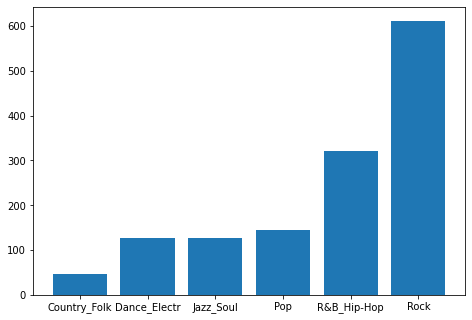

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted(result.iloc[:, 0].keys()),sorted(result.iloc[:, 0]))
plt.show()

In [21]:
# score versus genre

<AxesSubplot:xlabel='Gener_Genre', ylabel='Metacritic Critic Score'>

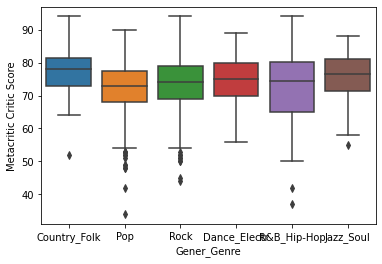

In [23]:
sns.boxplot(x = 'Gener_Genre', y = 'Metacritic Critic Score', data = df_selected)

Taking a look at the visualization above, Pop songs seem to have a lower mean rating, and Country and Folk songs the highest. Pop songs also have the most outliers, followed by Rock songs, that might be briging its mean down. Are Pop songs rated more poorly? First, let's take care of the outliers.

# Dealing with Outliers

In [41]:
# descriptive statistics of pop songs

In [48]:
pop_songs = df_selected[df_selected.Gener_Genre == 'Pop']
pop_songs = pop_songs.dropna()
pop_songs.describe()

,Unnamed: 0,Release Year,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,946.701923,2009.682692,71.745192,20.528846,7.950962,113.341346,70.653846,16.149038,71.701923,156.312500,0.508025,0.637210,-8.155105,0.684942,0.067254,0.294520,0.232501,0.190477,0.445323,121.878725
std,678.945935,2.550985,9.264105,8.578658,1.035131,251.014028,9.385742,7.427713,10.695504,254.842783,0.123164,0.183856,3.425549,0.182409,0.054913,0.241131,0.257866,0.062923,0.164550,12.093641
min,1.000000,2000.000000,34.000000,4.000000,2.500000,4.000000,32.000000,2.000000,24.000000,5.000000,0.134036,0.057429,-24.810357,0.000000,0.026815,0.000120,0.000000,0.091227,0.035314,85.020200
25%,363.750000,2009.000000,68.000000,14.000000,7.600000,13.000000,66.000000,11.000000,69.000000,17.750000,0.430750,0.513080,-9.608021,0.558889,0.037776,0.103909,0.022098,0.144931,0.318677,113.366194
50%,868.500000,2010.000000,73.000000,19.000000,8.300000,32.000000,72.000000,15.000000,74.000000,52.000000,0.512220,0.672815,-7.438865,0.691392,0.049377,0.245881,0.134132,0.173802,0.459670,121.887415
75%,1354.500000,2011.000000,78.000000,26.000000,8.600000,103.250000,77.000000,20.000000,78.250000,157.750000,0.593947,0.787426,-5.832981,0.809384,0.068471,0.447406,0.379645,0.227121,0.540637,129.570199
max,2453.000000,2013.000000,90.000000,40.000000,8.900000,2143.000000,92.000000,36.000000,91.000000,1453.000000,0.797375,0.961437,-1.596773,1.000000,0.403450,0.889889,0.912286,0.370111,0.861167,159.914100


As we can see, the mean metacritic score is 71.658824. Let's throw away scores that are more than 1.5 standard deviations away from the mean.

In [53]:
#Calculate the percentiles - 25 and 75 %
import numpy as np
q75, q25 = np.percentile(pop_songs['Metacritic Critic Score'] , [75 ,25])
print(f'Q3:{q75}')
print(f'Q1:{q25}')
# Calculate the percentile Range
iqr = q75 - q25
print(f'Interquartile Range: {iqr}')

# IQR +/- 40600
mins = pop_songs['Metacritic Critic Score'].median() - 1.5*iqr
maxs = pop_songs['Metacritic Critic Score'].median() + 1.5*iqr
print(f'Minimum  (threshould) : {mins}')
print(f'Maximum (threshould) : {maxs}')

Q3:78.0
Q1:68.0
Interquartile Range: 10.0
Minimum  (threshould) : 58.0
Maximum (threshould) : 88.0


In [55]:
pop_songs_no_outliers = pop_songs[(pop_songs['Metacritic Critic Score'] >= mins) & (pop_songs['Metacritic Critic Score'] <= maxs)]

Now, let's compare the old version of the unfiltered pop songs and the newer version with outliers removed: the mean has gone up slightly.

<AxesSubplot:xlabel='Gener_Genre', ylabel='Metacritic Critic Score'>

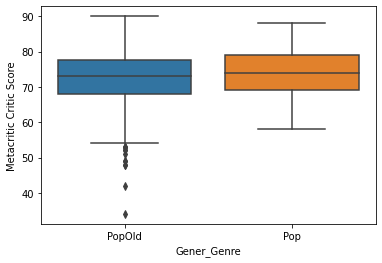

In [59]:
df_new = df_selected[df_selected.Gener_Genre == 'Pop']
df_new['Gener_Genre'] = ['PopOld' for i in range(len(df_new.Gener_Genre))]
df_new = df_new.append(pop_songs_no_outliers)
sns.boxplot(x = 'Gener_Genre', y = 'Metacritic Critic Score', data = df_new)

# Comparing Years

In [24]:
# score versus year

<AxesSubplot:xlabel='Release Year', ylabel='Metacritic Critic Score'>

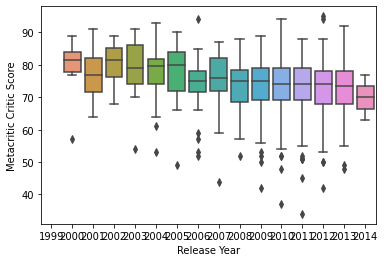

In [30]:
df_selected['Release Year'] = [int(i) for i in  df_selected['Release Year']]
sns.boxplot(x = 'Release Year', y = 'Metacritic Critic Score', data = df_selected[df_selected['Release Year'] >= 1999])

In the boxplot above, the years with the highest average ratings are the early 2000s, with a drop in the late 2000s and the early 2010s. What might features be correlated with this drop in yearly ratings? For this, let's divide the dataset into two periods, before 2005 and after 2005 and let's look at the averages in audio features for these two years.

In [61]:
df_before_2005 = df_selected[df_selected['Release Year'] < 2005]
df_after_2005 = df_selected[df_selected['Release Year'] >= 2005]

In [73]:
ave_b2005 = []
for i in range(10):
    ave_b2005.append(np.mean(df_before_2005.iloc[:, 18 + i]))

In [75]:
ave_aft2005 = []
for i in range(10):
    ave_aft2005.append(np.mean(df_after_2005.iloc[:, 18 + i]))

In [81]:
list(df_before_2005.columns[18:28])

['Danceability',
 'Energy',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo']

In [114]:
diction = {}
for i in range(len(list(df_before_2005.columns[18:28]))):
    print(list(df_before_2005.columns[18:28])[i])
    diction[list(df_before_2005.columns[18:28])[i]] = [ave_b2005[i], ave_aft2005[i]]

Danceability
Energy
Loudness
Mode
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo


In [115]:
df_before_2005 = df_before_2005.dropna()
df_after_2005 = df_after_2005.dropna()

In [116]:
df_both = pd.DataFrame(data = diction)
meta = [np.mean(df_before_2005.iloc[:,9 ]), np.mean(df_after_2005.iloc[:,9 ])]

In [117]:
df_both['Years'] = ['Pre2005', 'After2005']
df_both['Metacritic'] = meta
df_both.head()

,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Years,Metacritic
0,0.487446,0.640358,-9.101722,0.692718,0.077295,0.254531,0.203616,0.200372,0.463953,121.815425,Pre2005,78.470588
1,0.486430,0.643506,-8.214155,0.672094,0.073446,0.278534,0.254897,0.197156,0.420531,121.766645,After2005,73.314981


# Comparing Overall Features and Ratings

In [204]:
# score versus features

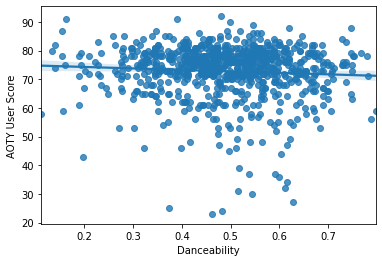

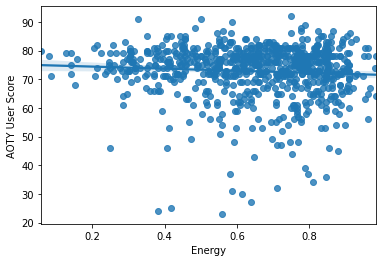

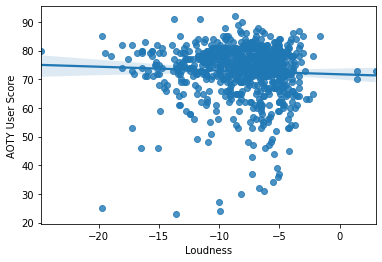

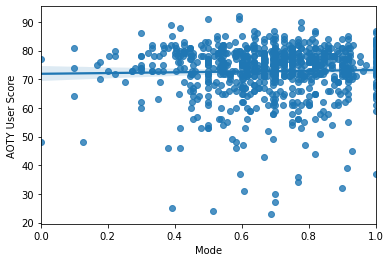

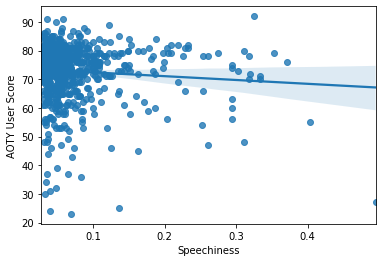

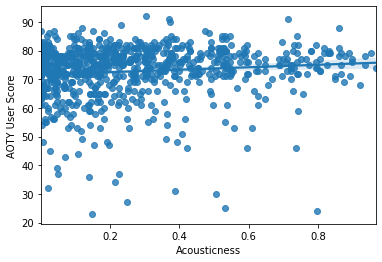

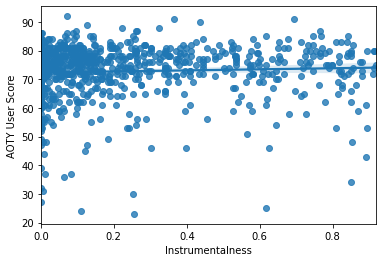

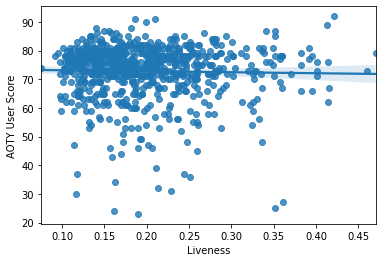

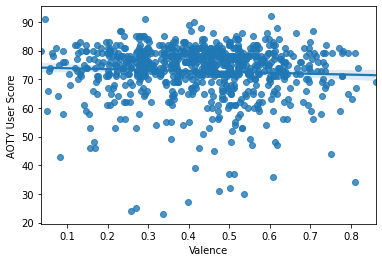

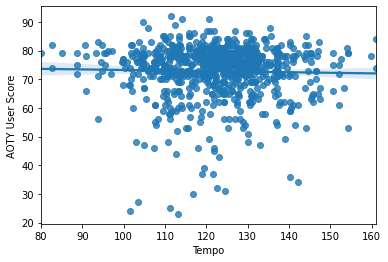

In [123]:
import matplotlib.pyplot as plt

for var in df_selected.columns[19:29]:
    sns.regplot(df_selected[var],df_selected['AOTY User Score'])
    plt.show()

In [ ]:
# pop music correlations

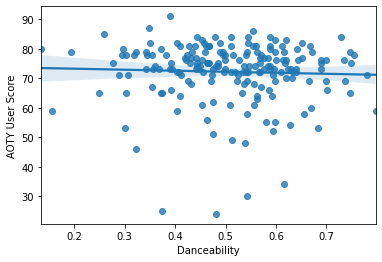

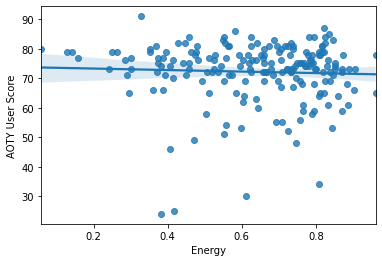

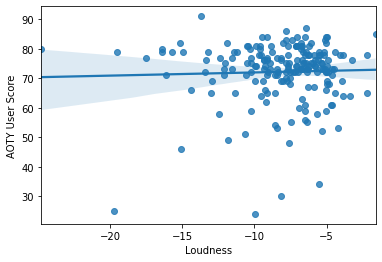

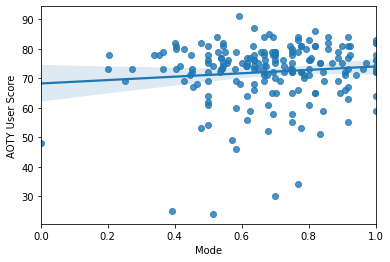

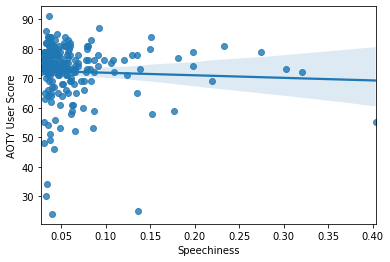

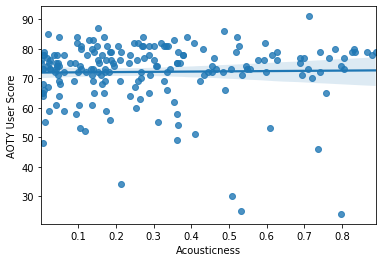

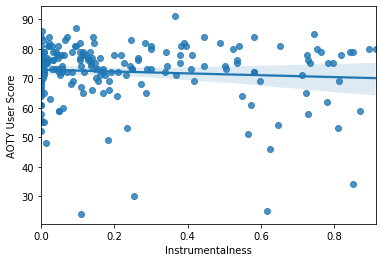

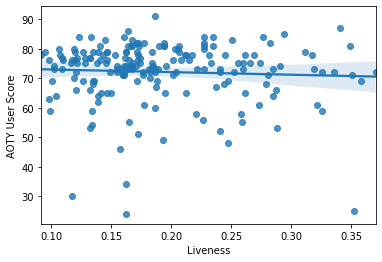

In [124]:
import matplotlib.pyplot as plt

for var in df_selected.columns[19:27]: 
    sns.regplot(df_selected[df_selected.Gener_Genre == 'Pop'][var],df_selected[df_selected.Gener_Genre == 'Pop']['AOTY User Score'])
    plt.show()

In [28]:
# electronic music correlations

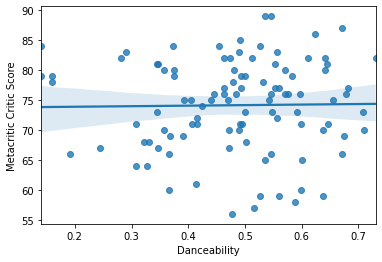

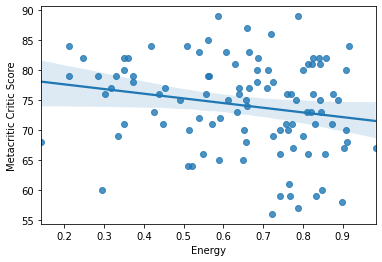

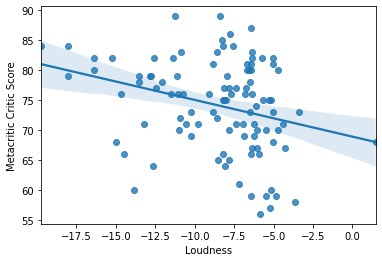

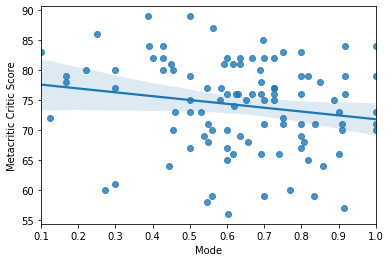

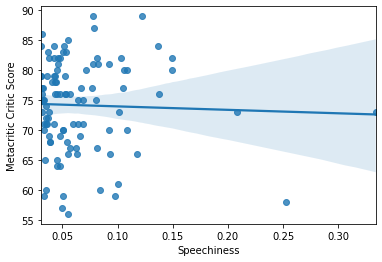

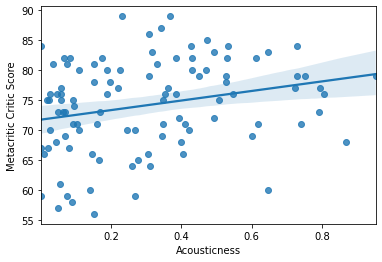

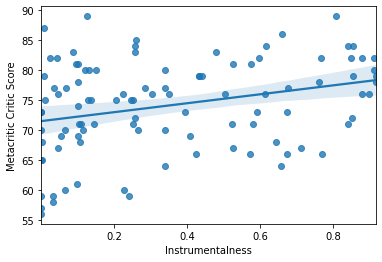

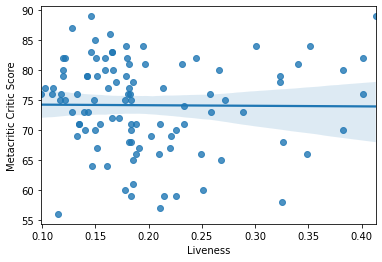

In [29]:
for var in df_selected.columns[19:27]:
    sns.regplot(df_selected[df_selected.Gener_Genre == 'Dance_Electr'][var],df_selected[df_selected.Gener_Genre == 'Dance_Electr']['Metacritic Critic Score'])
    plt.show()

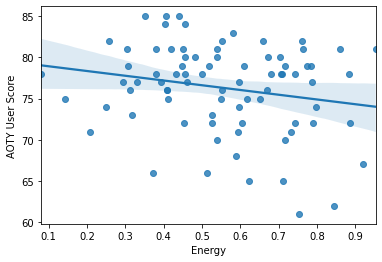

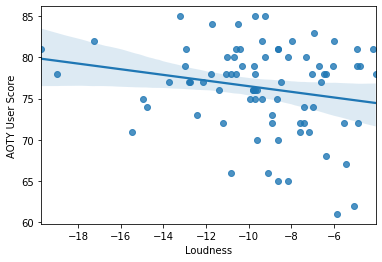

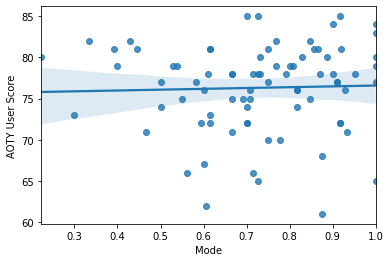

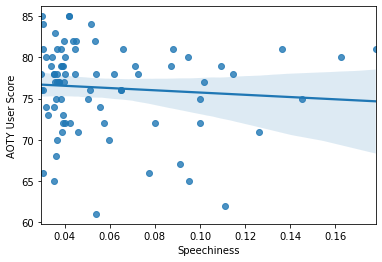

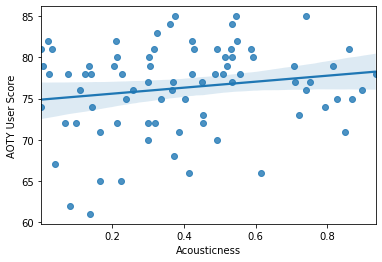

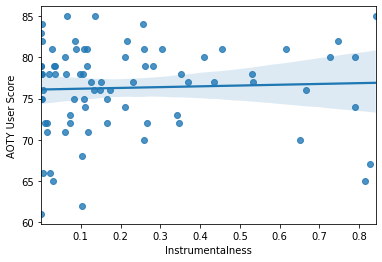

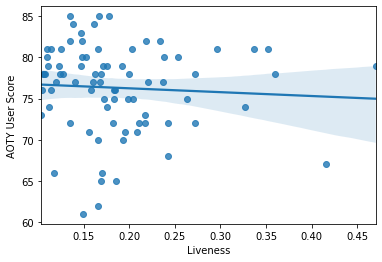

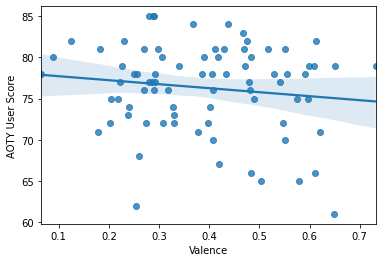

In [470]:
for var in df_selected.columns[19:27]: 
    sns.regplot(df_selected[df_selected.Gener_Genre == 'Country_Folk'][var],df_selected[df_selected.Gener_Genre == 'Country_Folk']['AOTY User Score'])
    plt.show()

In [138]:
# heatmap

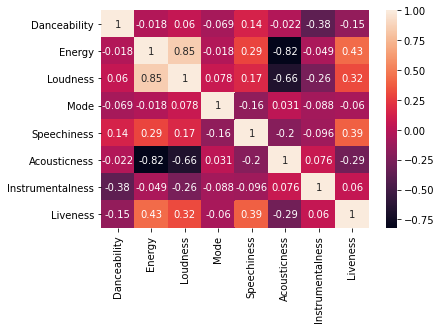

In [276]:
corrMatrix = df_selected.iloc[:,17:27].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()